In [1]:
import numpy as np
from numpy import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
pd.pandas.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = "C:\\Users\\pande\\Downloads\\Historical Weather API Data.csv"

df = pd.read_csv(file_path)

In [3]:
df.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),shortwave_radiation_sum (MJ/m²),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm)
0,1/1/2019,26.2,10.0,18.2,17.40,0.0,0.0,0,10.1,131,3.73
1,1/2/2019,27.0,13.5,20.1,17.27,0.0,0.0,0,10.2,325,3.65
2,1/3/2019,26.0,12.2,18.7,17.38,0.0,0.0,0,10.5,40,3.67
3,1/4/2019,26.3,11.5,18.7,17.34,0.0,0.0,0,10.2,109,3.73
4,1/5/2019,27.5,13.0,19.6,16.77,0.0,0.0,0,12.5,189,3.88


In [4]:
df.tail()

,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),shortwave_radiation_sum (MJ/m²),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm)
1497,2/6/2023,28.9,16.2,21.8,20.00,0.0,0.0,0,10.2,222,4.95
1498,2/7/2023,28.3,14.3,21.1,20.17,0.0,0.0,0,11.6,346,4.56
1499,2/8/2023,28.7,13.4,21.0,20.49,0.0,0.0,0,9.7,57,4.53
1500,2/9/2023,30.0,14.9,22.6,20.48,0.0,0.0,0,9.6,189,4.76
1501,2/10/2023,32.0,14.6,22.9,20.65,0.0,0.0,0,16.8,262,5.69


In [5]:
df.columns

Index(['time', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'temperature_2m_mean (°C)', 'shortwave_radiation_sum (MJ/m²)',
       'precipitation_sum (mm)', 'rain_sum (mm)', 'precipitation_hours (h)',
       'windspeed_10m_max (km/h)', 'winddirection_10m_dominant (°)',
       'et0_fao_evapotranspiration (mm)'],
      dtype='object')

In [6]:
df.shape


(1502, 11)

In [7]:
# Checking for duplicated entries.
print("Duplicate entry in data:",len(df[df.duplicated()])) 
     

Duplicate entry in data: 0


In [8]:
df=df.drop_duplicates()

In [9]:
# Custom Function for Dtype,Unique values and Null values.
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps
     

In [10]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",df.shape,"\n")

# Custom Function.
datainfo()
     

Total Rows and Columns in DataFrame is : (1502, 11) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
time,object,1502,1502,0,0.0
temperature_2m_max (°C),float64,1502,224,0,0.0
temperature_2m_min (°C),float64,1502,218,0,0.0
temperature_2m_mean (°C),float64,1502,220,0,0.0
shortwave_radiation_sum (MJ/m²),float64,1502,1043,0,0.0
precipitation_sum (mm),float64,1502,190,0,0.0
rain_sum (mm),float64,1502,190,0,0.0
precipitation_hours (h),int64,1502,25,0,0.0
windspeed_10m_max (km/h),float64,1502,221,0,0.0
winddirection_10m_dominant (°),int64,1502,347,0,0.0


In [11]:
# Renaming the column from time to date.

df.rename(columns={"time":"Date"},inplace = True)
     

In [12]:
# Converting the Date column in Datetime Dtype as it is in object Dtype.
df['Date'] = pd.to_datetime(df['Date'])

# Checking the info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             1502 non-null   datetime64[ns]
 1   temperature_2m_max (°C)          1502 non-null   float64       
 2   temperature_2m_min (°C)          1502 non-null   float64       
 3   temperature_2m_mean (°C)         1502 non-null   float64       
 4   shortwave_radiation_sum (MJ/m²)  1502 non-null   float64       
 5   precipitation_sum (mm)           1502 non-null   float64       
 6   rain_sum (mm)                    1502 non-null   float64       
 7   precipitation_hours (h)          1502 non-null   int64         
 8   windspeed_10m_max (km/h)         1502 non-null   float64       
 9   winddirection_10m_dominant (°)   1502 non-null   int64         
 10  et0_fao_evapotranspiration (mm)  1502 non-null   float64    

In [13]:
# Seperating Day, Month, Year from DataFrame Column.

df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [14]:
# Dropping the Date column after extracting necessory information.

df.drop(columns=['Date'],inplace=True)
     

In [15]:
# Checking the head of our dataset.
df.head()

,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),shortwave_radiation_sum (MJ/m²),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),Day,Month,Year
0,26.2,10.0,18.2,17.40,0.0,0.0,0,10.1,131,3.73,1,1,2019
1,27.0,13.5,20.1,17.27,0.0,0.0,0,10.2,325,3.65,2,1,2019
2,26.0,12.2,18.7,17.38,0.0,0.0,0,10.5,40,3.67,3,1,2019
3,26.3,11.5,18.7,17.34,0.0,0.0,0,10.2,109,3.73,4,1,2019
4,27.5,13.0,19.6,16.77,0.0,0.0,0,12.5,189,3.88,5,1,2019


In [16]:
# List of numerical variables.
numerical_features=[col for col in df.columns if df[col].dtype!='O']\

# Separating dataframe for Numerical feature.
num_data = df[numerical_features]
num_data.head()

,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),shortwave_radiation_sum (MJ/m²),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),Day,Month,Year
0,26.2,10.0,18.2,17.40,0.0,0.0,0,10.1,131,3.73,1,1,2019
1,27.0,13.5,20.1,17.27,0.0,0.0,0,10.2,325,3.65,2,1,2019
2,26.0,12.2,18.7,17.38,0.0,0.0,0,10.5,40,3.67,3,1,2019
3,26.3,11.5,18.7,17.34,0.0,0.0,0,10.2,109,3.73,4,1,2019
4,27.5,13.0,19.6,16.77,0.0,0.0,0,12.5,189,3.88,5,1,2019


In [17]:
# Statistical info.
df.describe().T
     

,count,mean,std,min,25%,50%,75%,max
temperature_2m_max (°C),1502.0,30.249068,5.201051,17.50,26.700,29.100,33.2000,43.30
temperature_2m_min (°C),1502.0,20.100999,5.089638,7.00,15.900,21.800,23.9000,30.50
temperature_2m_mean (°C),1502.0,24.940679,4.838645,13.40,21.700,24.600,27.9000,35.70
shortwave_radiation_sum (MJ/m²),1502.0,18.106698,5.811792,0.94,15.275,18.210,22.2700,28.45
precipitation_sum (mm),1502.0,3.054394,11.621508,0.00,0.000,0.000,1.2000,266.70
rain_sum (mm),1502.0,3.054394,11.621508,0.00,0.000,0.000,1.2000,266.70
precipitation_hours (h),1502.0,3.581225,6.245990,0.00,0.000,0.000,5.0000,24.00
windspeed_10m_max (km/h),1502.0,14.855992,4.859161,5.20,11.200,14.200,17.9000,34.20
winddirection_10m_dominant (°),1502.0,184.996671,104.482185,0.00,82.000,190.000,280.0000,360.00
et0_fao_evapotranspiration (mm),1502.0,4.627750,2.241718,0.37,3.200,4.085,5.7175,11.62


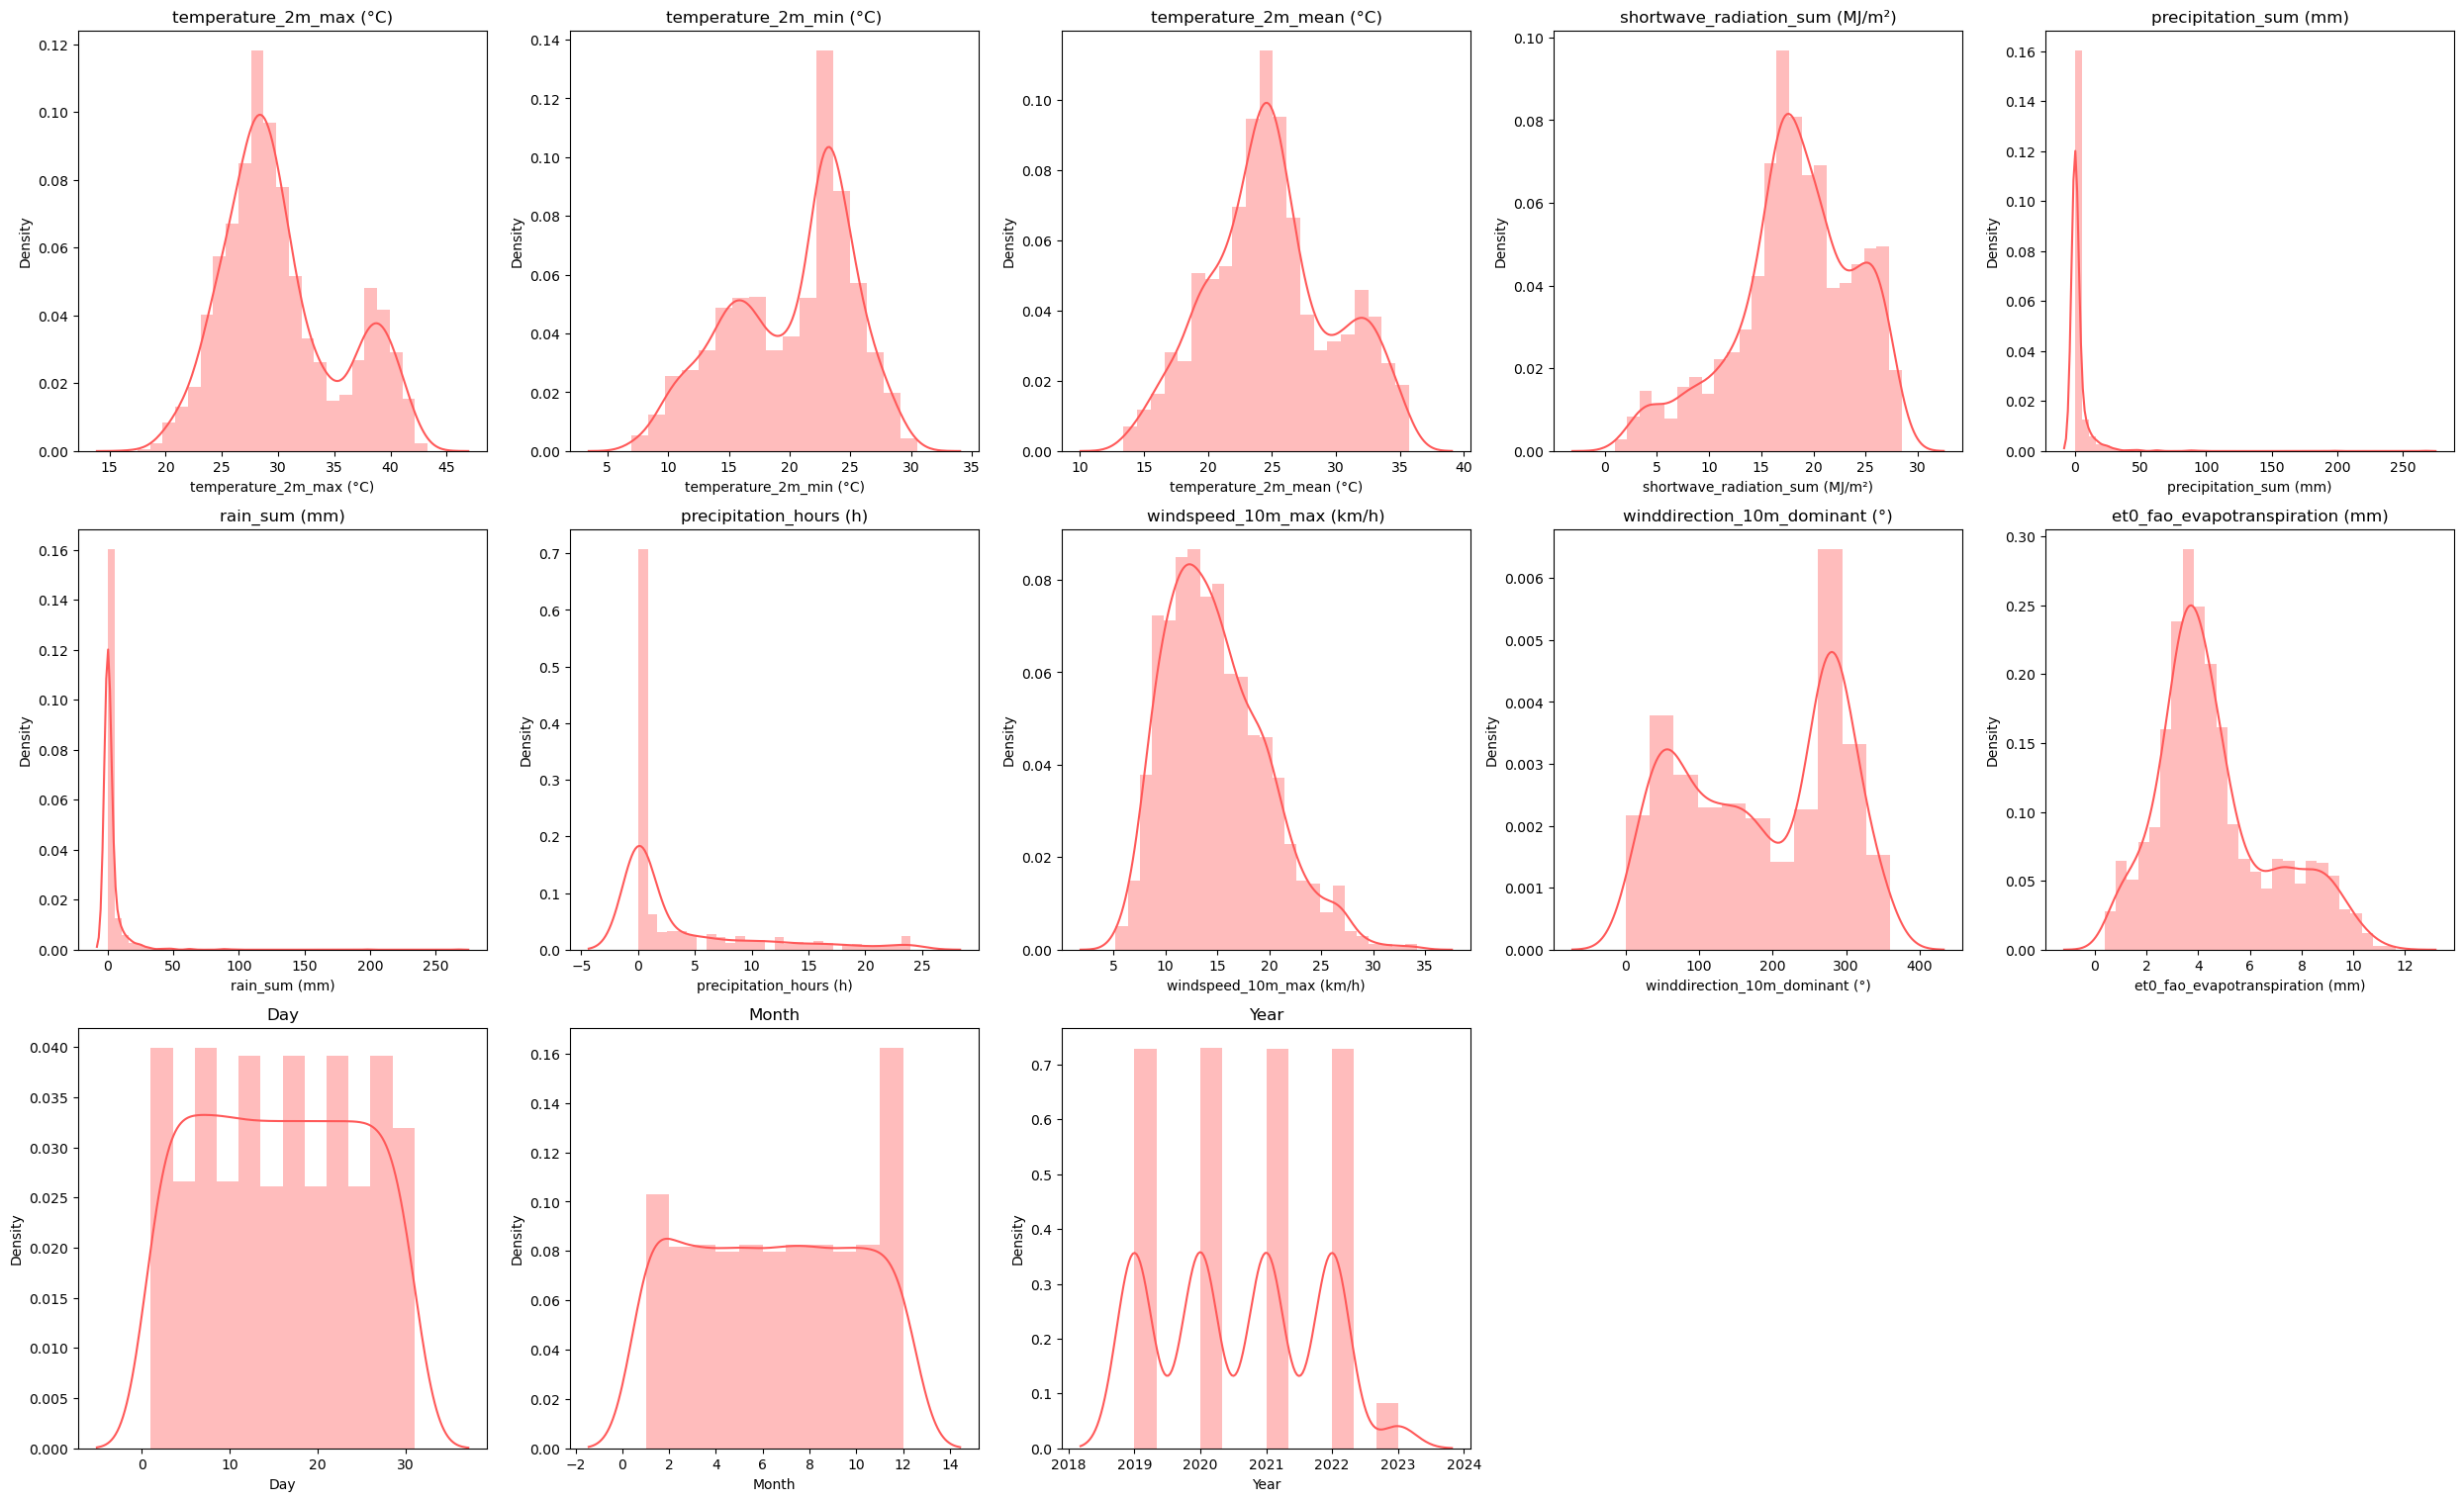

In [18]:
# Distibution plot of Numerical features to check the skewness.

n=1
plt.figure(figsize=(25, 35))
for i in num_data:
  plt.subplot(7,5,n)
  n= n+1
  sns.distplot(df[i],color='#FF5959')
  plt.title(i)
  plt.tight_layout()

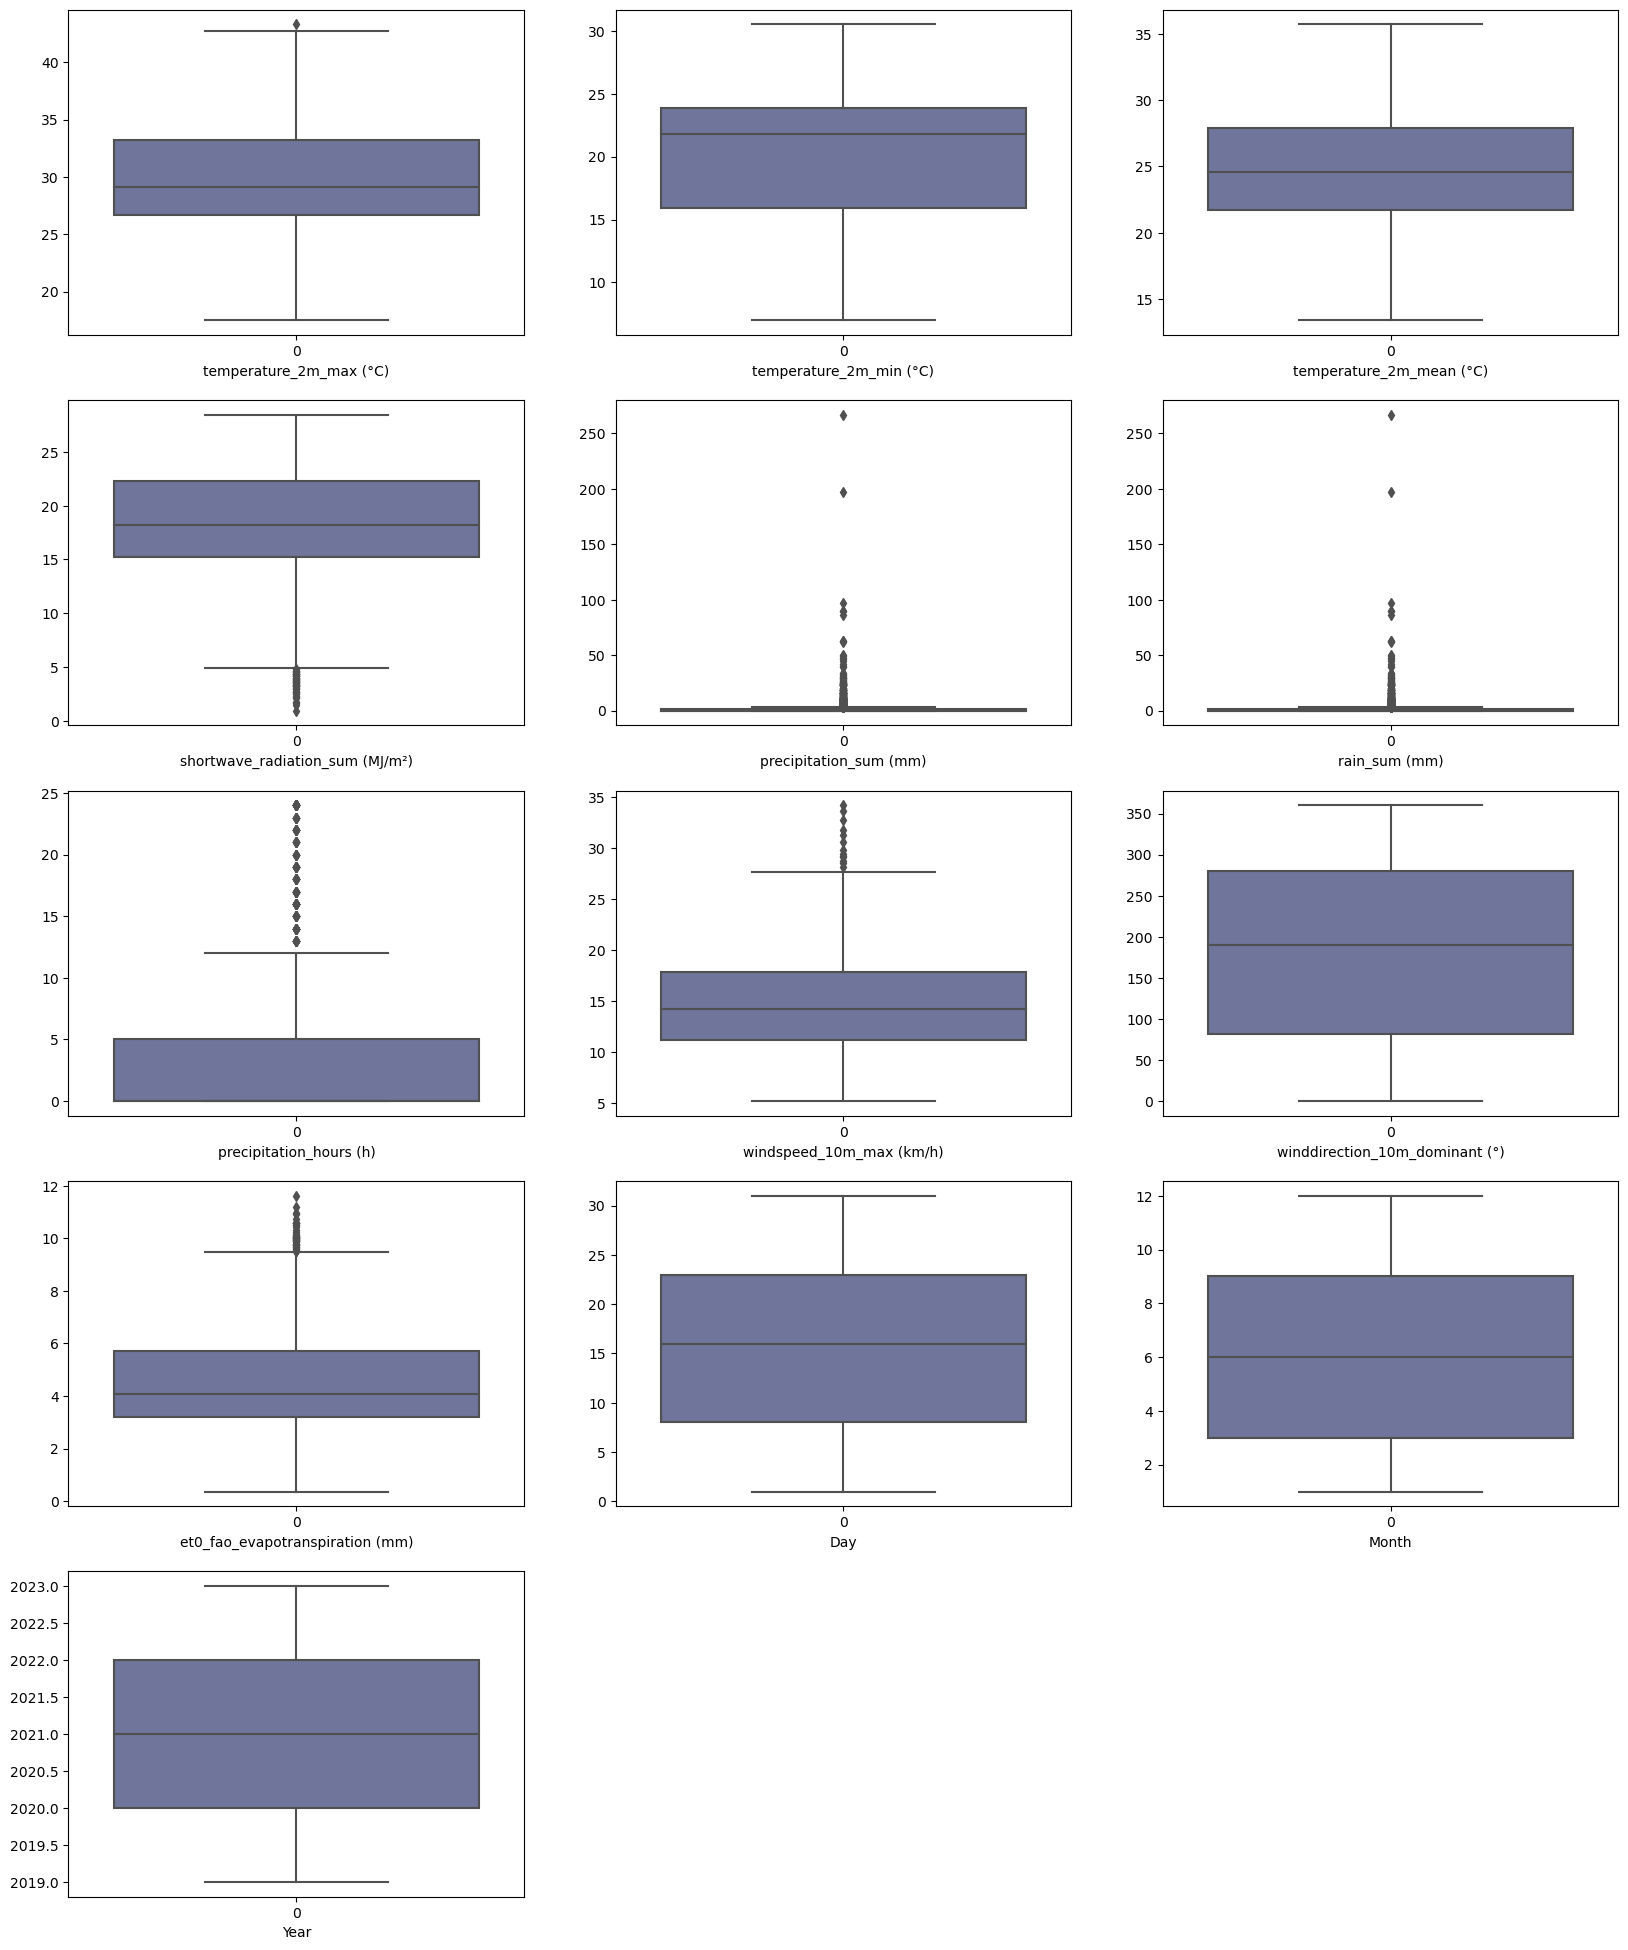

In [19]:
# Plotting a boxplot for each numerical feature to check the outliers.

plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature], color='#676FA3')
    plt.xlabel(numerical_feature)
    plotnumber += 1
plt.show()

<Axes: >

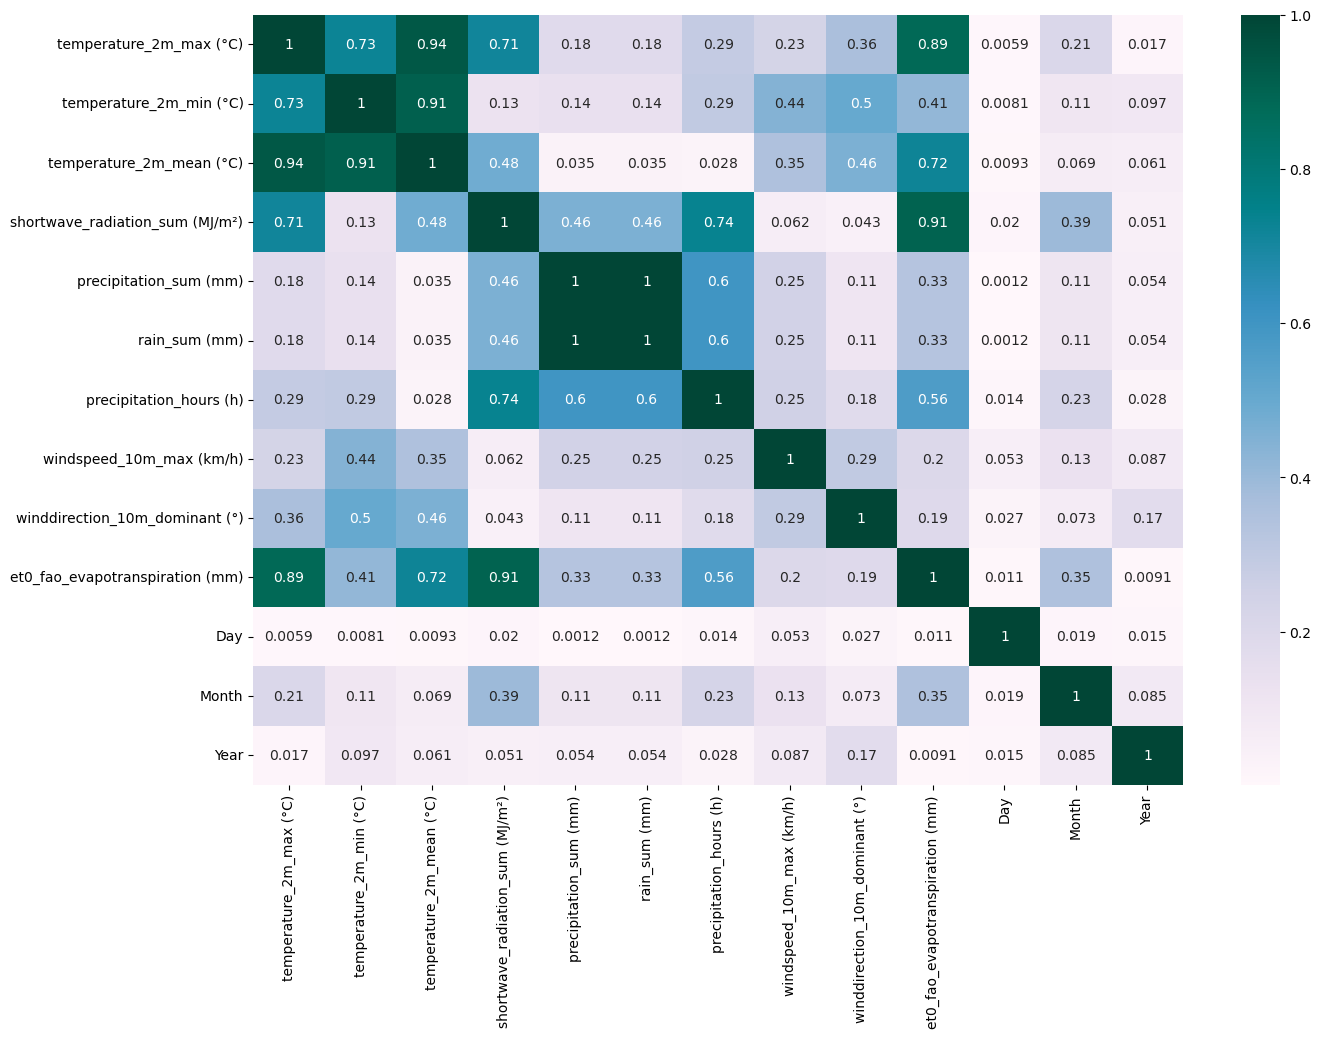

In [20]:
# Plotting correlation graph to check multicollinearity.

plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap= 'PuBuGn', annot=True)

In [21]:
# Importing necessary library.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Making function for VIF calculation.

def cal_VIF(F):
 
  
   VIF = pd.DataFrame()
   VIF["variables"] = F.columns
   VIF["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]
 
   return(VIF)
     

In [22]:
# Checking the VIF score of all the independent variables.

cal_VIF(df[[i for i in df.describe().columns]])
     


,variables,VIF
0,temperature_2m_max (°C),3256.666733
1,temperature_2m_min (°C),1087.972797
2,temperature_2m_mean (°C),6227.416963
3,shortwave_radiation_sum (MJ/m²),146.333315
4,precipitation_sum (mm),inf
5,rain_sum (mm),inf
6,precipitation_hours (h),5.665058
7,windspeed_10m_max (km/h),22.443184
8,winddirection_10m_dominant (°),5.767597
9,et0_fao_evapotranspiration (mm),132.634812


In [23]:
# Checking VIF score of independent variables without precipitation_sum (mm).

cal_VIF(df[[i for i in df.describe().columns if i not in ['precipitation_sum (mm)']]])
     

,variables,VIF
0,temperature_2m_max (°C),3256.666733
1,temperature_2m_min (°C),1087.972797
2,temperature_2m_mean (°C),6227.416963
3,shortwave_radiation_sum (MJ/m²),146.333315
4,rain_sum (mm),1.762459
5,precipitation_hours (h),5.665058
6,windspeed_10m_max (km/h),22.443184
7,winddirection_10m_dominant (°),5.767597
8,et0_fao_evapotranspiration (mm),132.634812
9,Day,4.203103


In [24]:
# Checking VIF score of independent variables without precipitation_sum (mm).

cal_VIF(df[[i for i in df.describe().columns if i not in ['precipitation_sum (mm)', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)']]])


,variables,VIF
0,temperature_2m_mean (°C),141.359432
1,shortwave_radiation_sum (MJ/m²),144.387045
2,rain_sum (mm),1.715604
3,precipitation_hours (h),5.298301
4,windspeed_10m_max (km/h),17.824984
5,winddirection_10m_dominant (°),5.763512
6,et0_fao_evapotranspiration (mm),96.330867
7,Day,4.201827
8,Month,6.009492
9,Year,135.901698


In [25]:
# Checking VIF score of independent variables without precipitation_sum (mm).

cal_VIF(df[[i for i in df.describe().columns if i not in ['precipitation_sum (mm)', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)','Year', 'Day']]])


,variables,VIF
0,temperature_2m_mean (°C),96.264165
1,shortwave_radiation_sum (MJ/m²),46.178689
2,rain_sum (mm),1.711917
3,precipitation_hours (h),5.268532
4,windspeed_10m_max (km/h),12.625923
5,winddirection_10m_dominant (°),5.685750
6,et0_fao_evapotranspiration (mm),35.718093
7,Month,5.654246


In [26]:
# Dropping the columns with multi-collinearity.

df = df.drop(['precipitation_sum (mm)', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)','Year', 'Day'],axis=1)


<Axes: >

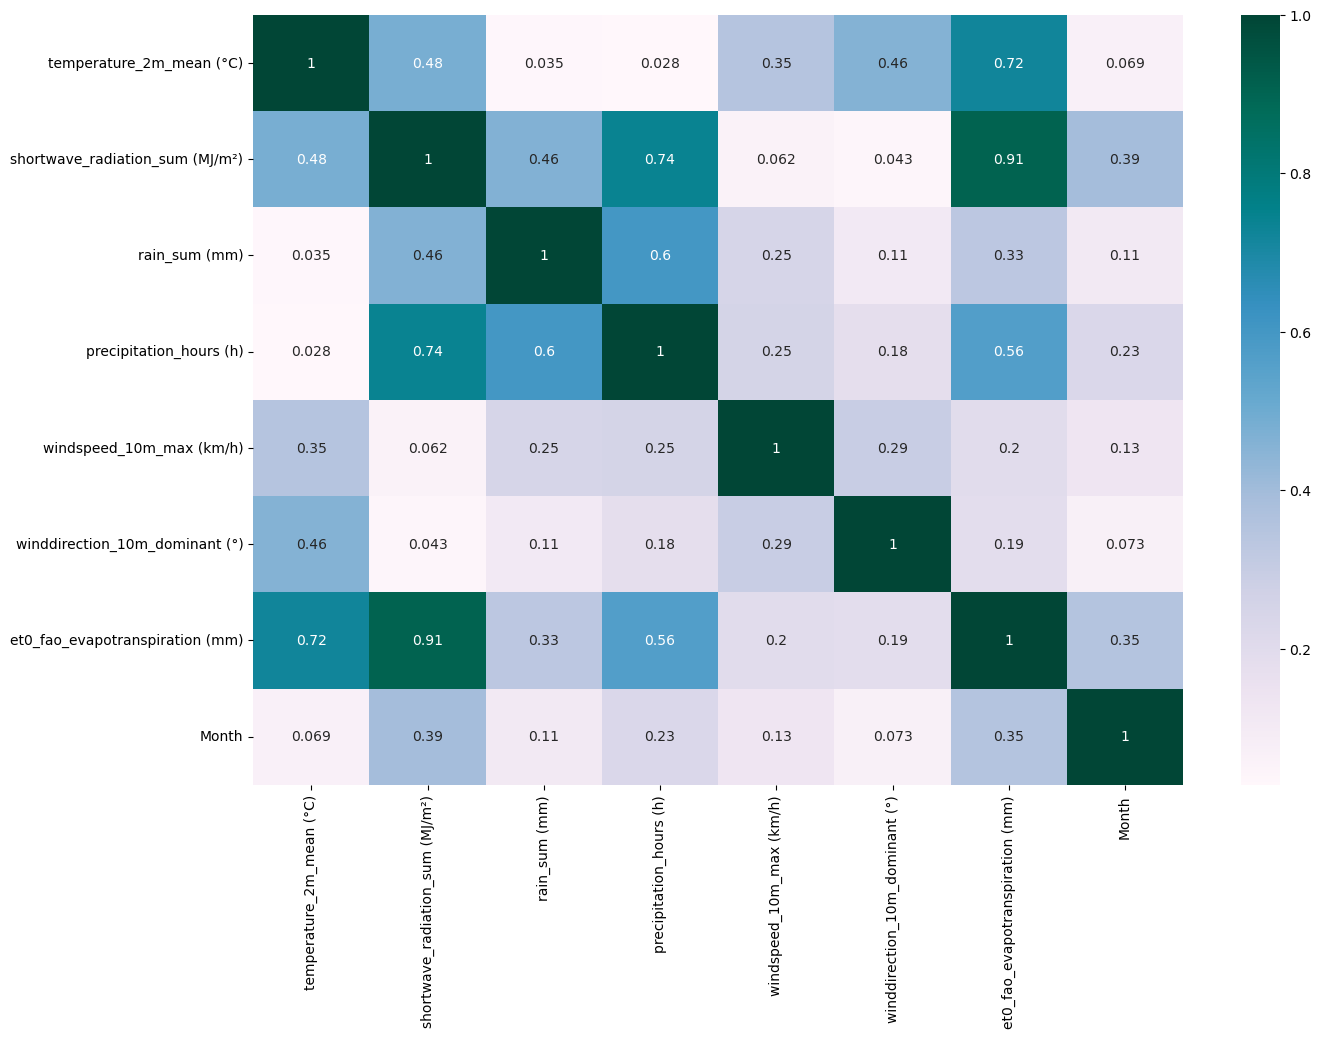

In [27]:
# Checking multicollinearity after removing the correlated fields from our dataframe.

plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap= 'PuBuGn', annot=True)


In [28]:
# Importing necessary Libraries.

from sklearn.model_selection import train_test_split
     

In [29]:
# Data for all the independent variables.
X = np.sqrt(df.drop('rain_sum (mm)',axis=1))

# Data for the dependent variable
y = np.sqrt(df['rain_sum (mm)'])

In [30]:
# Dividing the data in training and test dataset.

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [31]:
# Checking the shape of our train and test data.

print(X_train.shape)
print(X_test.shape)

(1201, 7)
(301, 7)


In [32]:
# Transforming data.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
     

In [33]:
# Importing important library.

from sklearn.ensemble import RandomForestRegressor

In [34]:
#Creating an instance for the random forest regressor.
rf = RandomForestRegressor()

In [35]:
param_grid_cv = {'n_estimators': [200, 500],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'max_depth' : [5,6,7,8,9,10,11],}

In [36]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator = rf, param_grid = param_grid_cv, cv = 5)

In [37]:
# Fitting the training data into the model.

CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [38]:
# Best set of parametes.

CV_rfc.best_params_

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}

In [39]:
# Predict on train data.
y_pred_train_grid_cvr = CV_rfc.predict(X_train)

# Predict on test data.
y_pred_test_grid_cvr = CV_rfc.predict(X_test)

In [40]:
# Calculating model score on train data.

print("Model Score:",CV_rfc.score(X_train,y_train))

Model Score: 0.976632573499248


In [41]:
# Evaluation metrics for TRAIN data.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
MSE_rf = mean_squared_error(y_train, y_pred_train_grid_cvr)
MAE_rf= mean_absolute_error(y_train, y_pred_train_grid_cvr)
RMSE_rf=np.sqrt(MSE_rf)
r2_rf= r2_score(y_train, y_pred_train_grid_cvr)
Adjusted_R2_rf = (1-(1-r2_score(y_train, y_pred_train_grid_cvr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


In [42]:
print(f"The Mean Absolute Error (MAE) is {MAE_rf}.")
print(f"The Mean Squred Error(MSE) is {MSE_rf}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_rf}.")
print(f"The R2 Score is {r2_rf}.")
print(f"Adjusted R2 is {Adjusted_R2_rf}." )
     

The Mean Absolute Error (MAE) is 0.0995789795975596.
The Mean Squred Error(MSE) is 0.05517166567271978.
The Root Mean Squared Error(RMSE) is 0.2348864952966002.
The R2 Score is 0.976632573499248.
Adjusted R2 is 0.9760743073371141.


In [43]:
# Storing metrics in a dictionary.
dict1={'Model':'Random forest regression',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}

In [44]:
#Storing the evaluation metrices in dataframe.
training_df=pd.DataFrame(dict1,index=[1])
training_df
     

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Random forest regression,0.1,0.055,0.235,0.977,0.98


In [45]:
# Evaluation metrics for TEST data.

MSE_rf= mean_squared_error(y_test, y_pred_test_grid_cvr)
MAE_rf= mean_absolute_error(y_test, y_pred_test_grid_cvr)
RMSE_rf=np.sqrt(MSE_rf)
r2_rf= r2_score((y_test), (y_pred_test_grid_cvr))
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_grid_cvr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


In [46]:
print(f"The Mean Absolute Error (MAE) is {MAE_rf}.")
print(f"The Mean Squred Error(MSE) is {MSE_rf}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_rf}.")
print(f"The R2 Score is {r2_rf}.")
print(f"Adjusted R2 is {Adjusted_R2_rf}." )

The Mean Absolute Error (MAE) is 0.23623904425196945.
The Mean Squred Error(MSE) is 0.27031594742051457.
The Root Mean Squared Error(RMSE) is 0.5199191739304433.
The R2 Score is 0.8812539562848902.
Adjusted R2 is 0.8784170200869184.


In [47]:
# Storing the test set metrics value into the test evaluation dataframe.
dict2={'Model':'Random forest regression',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}

In [48]:
test_df=pd.DataFrame(dict2,index=[1])
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Random forest regression,0.236,0.27,0.52,0.881,0.88


Text(0.5, 1.0, 'Actual and Predicted Result')

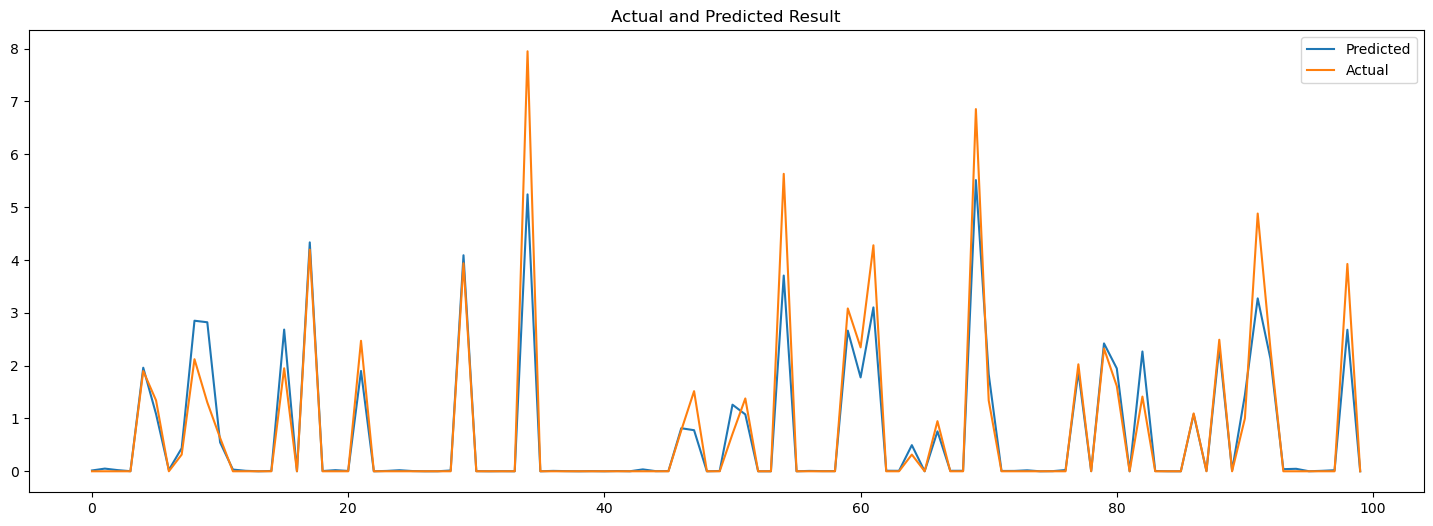

In [49]:
# Plotting the actual vs predicted line graph.

plt.figure(figsize=(18,6))
plt.plot((y_pred_test_grid_cvr)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Result')